Importamos librerias que utilizaremos en la exploracion de los date set 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Cargamos dataset con los datos que trabajaremos

In [ ]:

df = pd.read_csv('https://raw.githubusercontent.com/sergiakalorth/MachineLearning-CIM-UPC/master/MiniProject/datasets/Telco%20Custormer%20Churn/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Empezamos a reliazar el prepocesamiento de los datos 

In [ ]:
pd.set_option('display.max_rows', 300)
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


Podemos encontrar que tenemos datos tipo Object los cuales queremos limpiar en caso de ser espacios vacios o no tener algun valor 

In [ ]:
import numpy as np
df = df.replace(" ",np.nan)

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

Simplificamos los datos Eliminando los datos de las columnas que no seran utiles

In [37]:
df.drop(columns=["customerID"])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


Podemos observar a continuación de  una tabla estadística descriptiva de los datos

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


En el siguiente paso normalizaremos, donde los estandarizaremos para poder graficar y aplicar modelos ML 

In [ ]:
Pasaremos los datos tipo texto a datos numericos 

In [ ]:
from sklearn import preprocessing
col = df.select_dtypes(include = 'object').columns
le = preprocessing.LabelEncoder()
for i in col:
  le.fit(df[i].astype(str))  
  df[i] = le.transform(df[i].astype(str))

A continuacion una vez ya tenido todos los datos tipo numericos, aplicaremos KNNimputer para hacer la transformación de datos donde se estimaran los valores que faltan, es decir el imputador ajustara el conjunto de datos 

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputed_data = imputer.fit_transform(df)

df_imputed = pd.DataFrame(imputed_data,columns=df.columns)
df_imputed.loc[df['TotalCharges'].isna()==True]['TotalCharges']

488     263.325
753     188.700
936     227.600
1082     93.025
1340    516.525
3331    130.250
3826     78.250
4380     22.325
5218    126.850
6670    543.300
6754    383.500
Name: TotalCharges, dtype: float64

Podemos Obersevar como queda el dataset una vez Imputado los datos

In [ ]:
df_imputed.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0.0,0.0,0.0,34.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0.0,0.0,0.0,45.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0


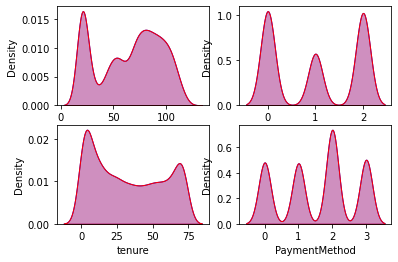

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplot(221)
ax = sns.kdeplot(df.MonthlyCharges,  shade=True, color="b", legend = 'True')
bx = sns.kdeplot(df.MonthlyCharges, shade=True, color="r", legend = 'True')
plt.subplot(222)
ax = sns.kdeplot(df.StreamingMovies,  shade=True, color="b", legend = 'True')
bx = sns.kdeplot(df.StreamingMovies, shade=True, color="r", legend = 'True')
plt.subplot(223)
ax = sns.kdeplot(df.tenure,  shade=True, color="b", legend = 'True')
bx = sns.kdeplot(df.tenure, shade=True, color="r", legend = 'True')
plt.subplot(224)
ax = sns.kdeplot(df.PaymentMethod,  shade=True, color="b", legend = 'True')
bx = sns.kdeplot(df.PaymentMethod, shade=True, color="r", legend = 'True')

Con esto se ve que las siguientes variables son las que muestran algo interesante en el pairplot, en donde ciertos comportamientos se ven reflejados en la agrupacion por churn

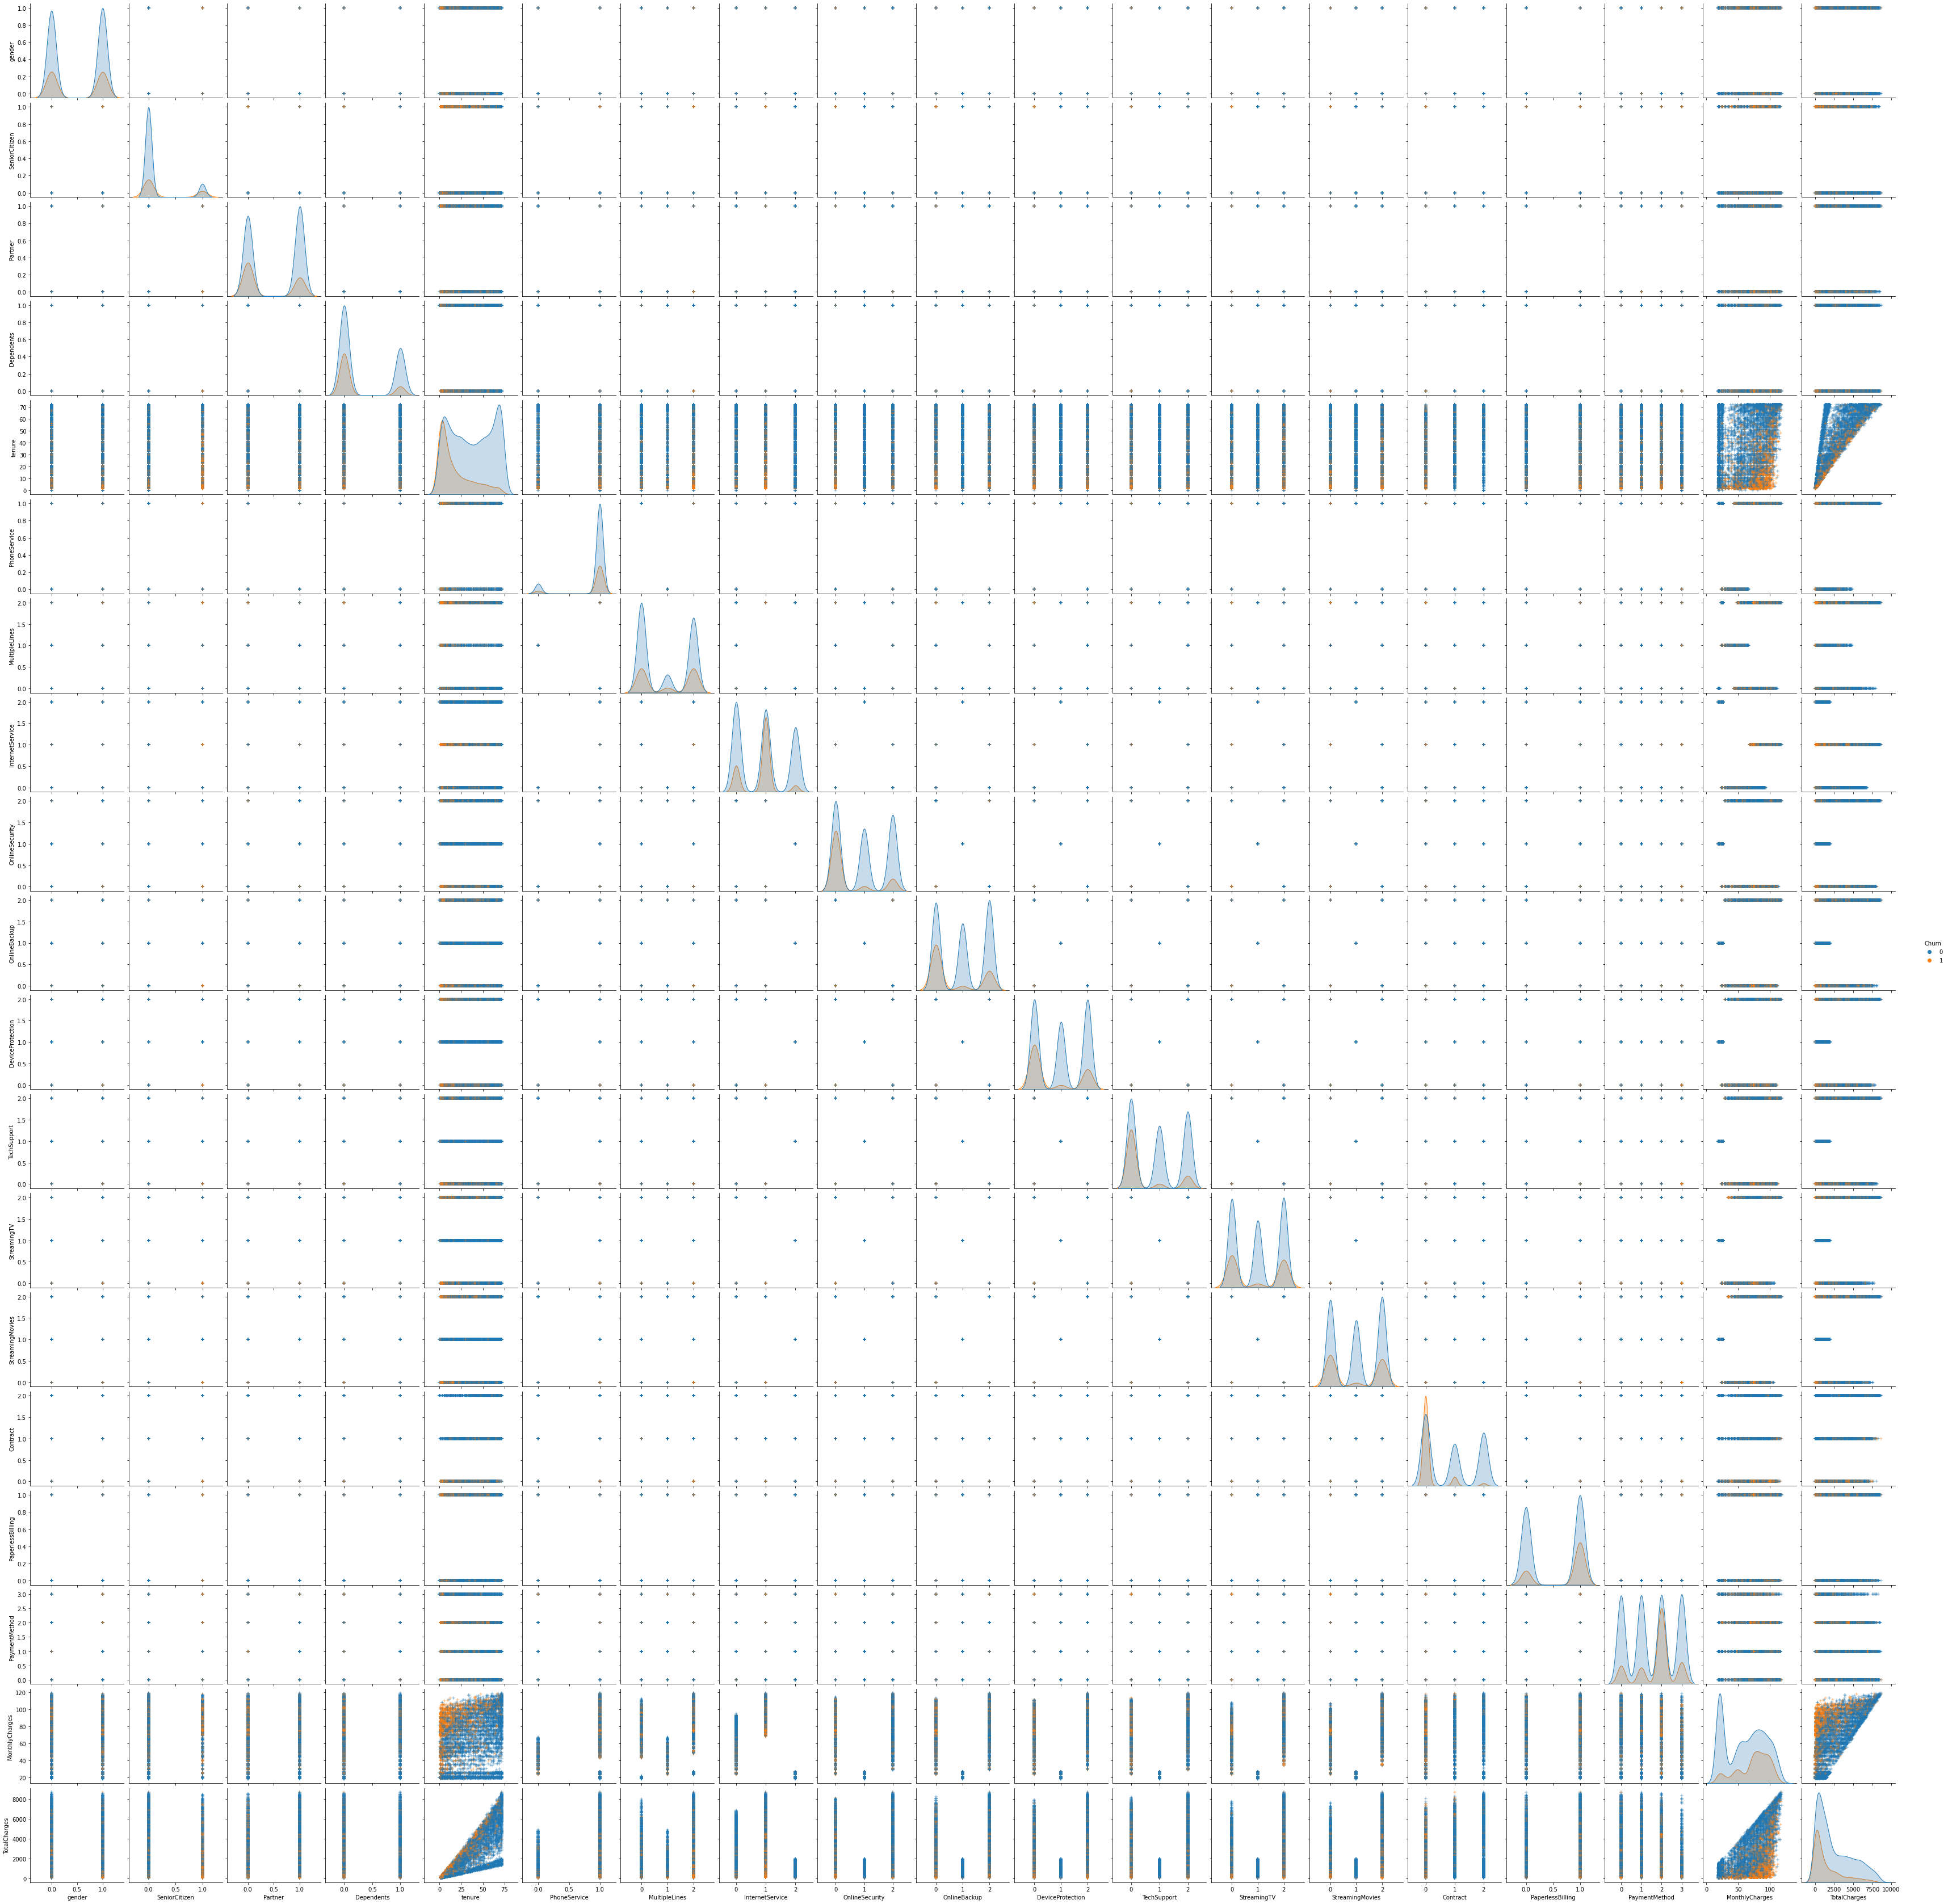

In [38]:
tmp = df.drop('customerID', axis=1)
g = sns.pairplot(tmp, hue='Churn', markers='+')
plt.show()



Analizando las graficas que podemos visualizar anteriormente se puede determinar y proponer mediante estas metricas al departamento de ventas en mejorar los servicios que se le pueden ofrecer al cliente, mediante un modo de promocion, como tambie tener en cuenta a traves de estudio de mercado la competencia que hay actualmente para asi  garantizar un una precio/servicio mas competitivo que se le brindara al cliente debido a que si observamos la relacion que tiene los puntos TexhSupport, deviceproteccion, PhoneService tiene un impacto significante a Churn. 




Para este tipo de caso, se aplicara un Modelo de Clasificación  de tipo SVM, El entrenamiento del modelo se realiza con datos históricos de los usuarios, donde para cada uno se conoce si hubo o no fuga (churn rate).

In [32]:
import sklearn.metrics
from sklearn.preprocessing import StandardScaler


In [33]:
X1= df_imputed.drop(columns = ["Churn"])
y = df_imputed.Churn
scaler = StandardScaler()

X=scaler.fit_transform(X1)


Vamos ahora a separar el dataset para tener un training set y un test set

In [34]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2, random_state=42)

Aplicamos el Modelo de Support Vector Machine ya que deseamos hacer una predicción de los clientes que se quedan o se van, donde a traves de este modelo se tendra una línea optima la cual maximiza el margen entre una clase y otra

In [35]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
tp = clf.predict(X_train)


testp = clf.predict(X_test)
print("Con el conjunto test la accuracy es de {}.".format(accuracy_score(y_test, testp)))

Con el conjunto test la accuracy es de 0.8048261178140526.


Con el modelo entrenado de SVM se puede obtener un accuracy de 80 % el cual pueden se pueden aplicar a futuras features para apoyar al equipo de ventas para tomar acciones frente a esto.